# Assignment - 12 (Naive Bayes)

1) Prepare a classification model using Naive Bayes for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

In [1]:
!pip install mlxtend

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## SalaryData_Train

In [3]:
# importing train dataaset

Train=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Assignment DS (Husen)\Assignment No 12\Naive Bayes\SalaryData_Train.csv")
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Performing EDA & Visualization on "Train" dataset

# EDA

In [4]:
Train.shape

(30161, 14)

In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
Train.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [7]:
# Checking descriptive statistics of dataset

Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# checking Duplicate raws

Train[Train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [9]:
df1=Train.drop_duplicates()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
# Checking Correlation between numerical function

correlation = df1.corr()
correlation

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


In [11]:
# Checking Correlation between numerical function

# correlation withour droping duplicated raws

correlationX = Train.corr() 
correlationX

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


# Visualization

<AxesSubplot:>

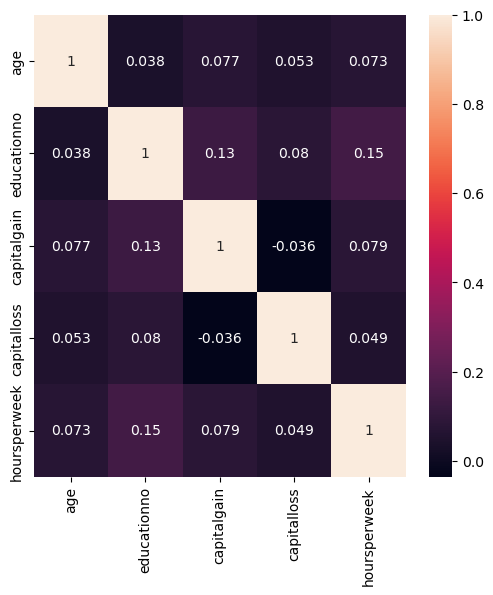

In [12]:
# creating heatmap by use of correlation

plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True)

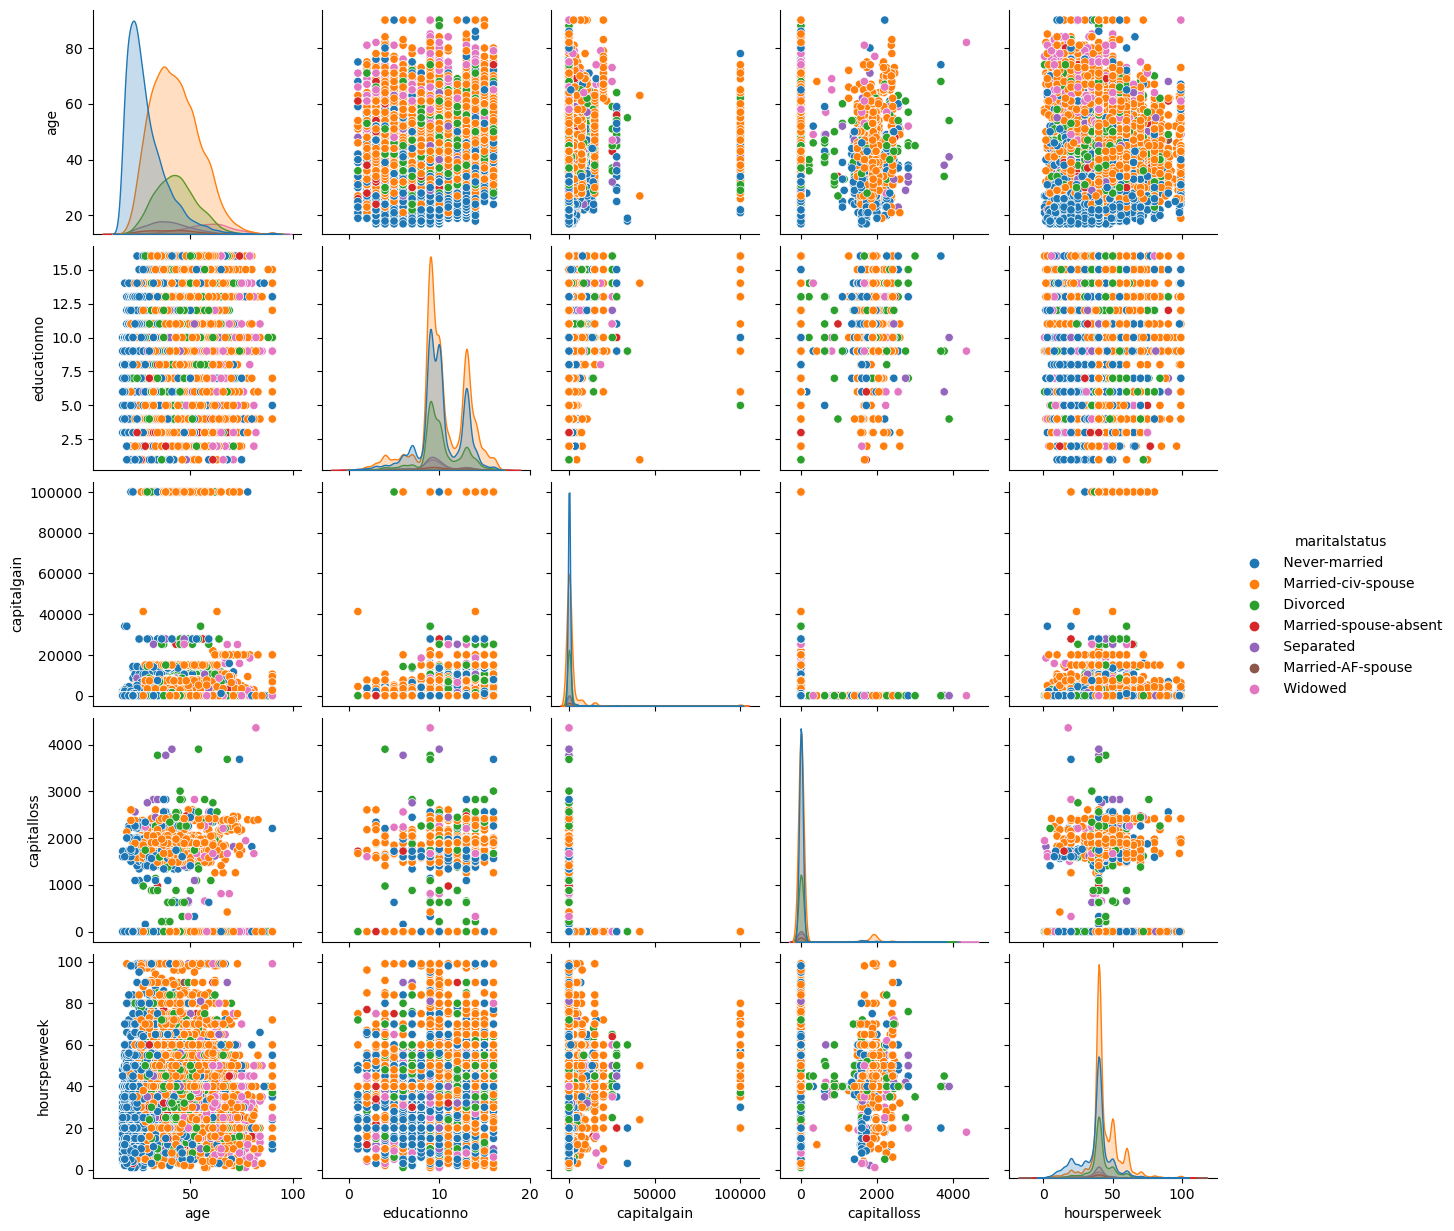

In [13]:
# ploting pair plot to visualise the attributes all at once

sns.pairplot(data=Train, hue = 'maritalstatus')

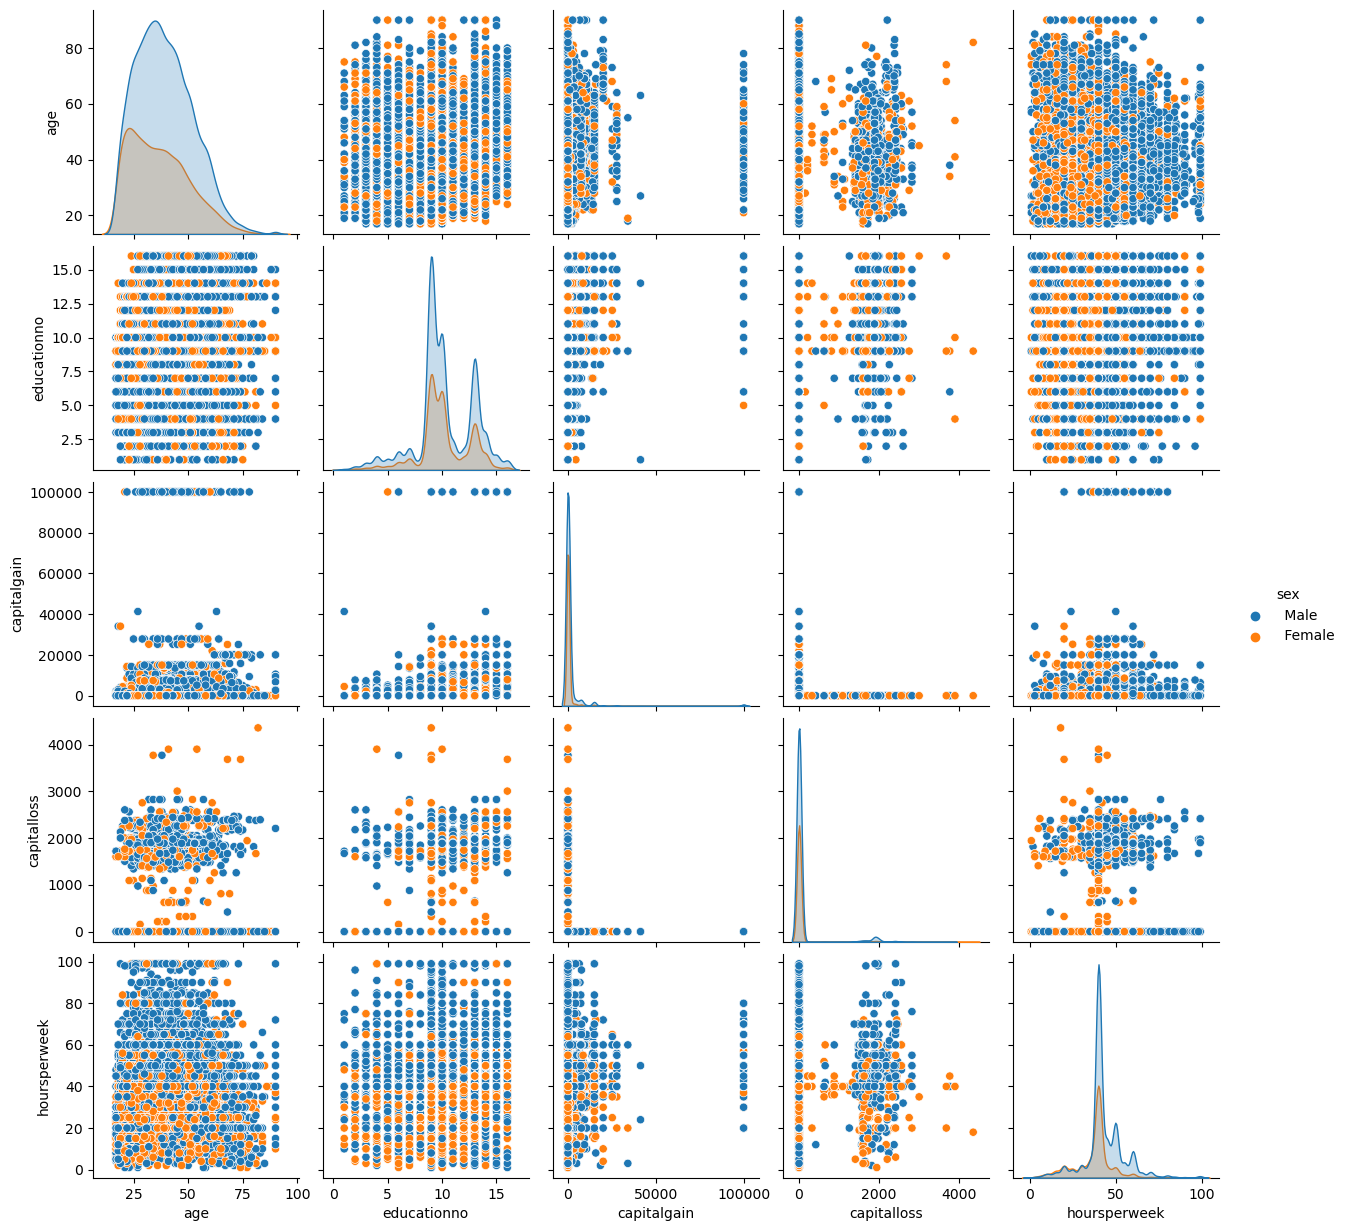

In [14]:
sns.pairplot(data=Train, hue = 'sex')

# Calculating Unique Values

In [15]:
Train['workclass'].unique(), Train['workclass'].value_counts()

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             22285
  Self-emp-not-inc     2499
  Local-gov            2067
  State-gov            1279
  Self-emp-inc         1074
  Federal-gov           943
  Without-pay            14
 Name: workclass, dtype: int64)

In [16]:
Train['education'].unique(), Train['education'].value_counts()

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th'], dtype=object),
  HS-grad         9840
  Some-college    6677
  Bachelors       5044
  Masters         1627
  Assoc-voc       1307
  11th            1048
  Assoc-acdm      1008
  10th             820
  7th-8th          557
  Prof-school      542
  9th              455
  12th             377
  Doctorate        375
  5th-6th          288
  1st-4th          151
  Preschool         45
 Name: education, dtype: int64)

In [17]:
Train['maritalstatus'].unique(), Train['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
  Married-civ-spouse       14065
  Never-married             9725
  Divorced                  4214
  Separated                  939
  Widowed                    827
  Married-spouse-absent      370
  Married-AF-spouse           21
 Name: maritalstatus, dtype: int64)

In [18]:
Train['occupation'].unique(), Train['occupation'].value_counts()

(array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
  Prof-specialty       4038
  Craft-repair         4030
  Exec-managerial      3992
  Adm-clerical         3721
  Sales                3584
  Other-service        3212
  Machine-op-inspct    1965
  Transport-moving     1572
  Handlers-cleaners    1350
  Farming-fishing       989
  Tech-support          912
  Protective-serv       644
  Priv-house-serv       143
  Armed-Forces            9
 Name: occupation, dtype: int64)

In [19]:
Train['race'].unique(), Train['race'].value_counts()

(array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
        ' Other'], dtype=object),
  White                 25932
  Black                  2817
  Asian-Pac-Islander      895
  Amer-Indian-Eskimo      286
  Other                   231
 Name: race, dtype: int64)

In [20]:
Train['sex'].unique(), Train['sex'].value_counts()

(array([' Male', ' Female'], dtype=object),
  Male      20380
  Female     9781
 Name: sex, dtype: int64)

In [21]:
Train['native'].unique(), Train['native'].value_counts()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary'], dtype=object),
  United-States                 27504
  Mexico                          610
  Philippines                     188
  Germany                         128
  Puerto-Rico                     109
  Canada                          107
  India                           100
  El-Salvador                     100
  Cuba                             92
  England                          86
  Jamaica       

In [22]:
Train['native'].unique(), Train['native'].value_counts()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary'], dtype=object),
  United-States                 27504
  Mexico                          610
  Philippines                     188
  Germany                         128
  Puerto-Rico                     109
  Canada                          107
  India                           100
  El-Salvador                     100
  Cuba                             92
  England                          86
  Jamaica       

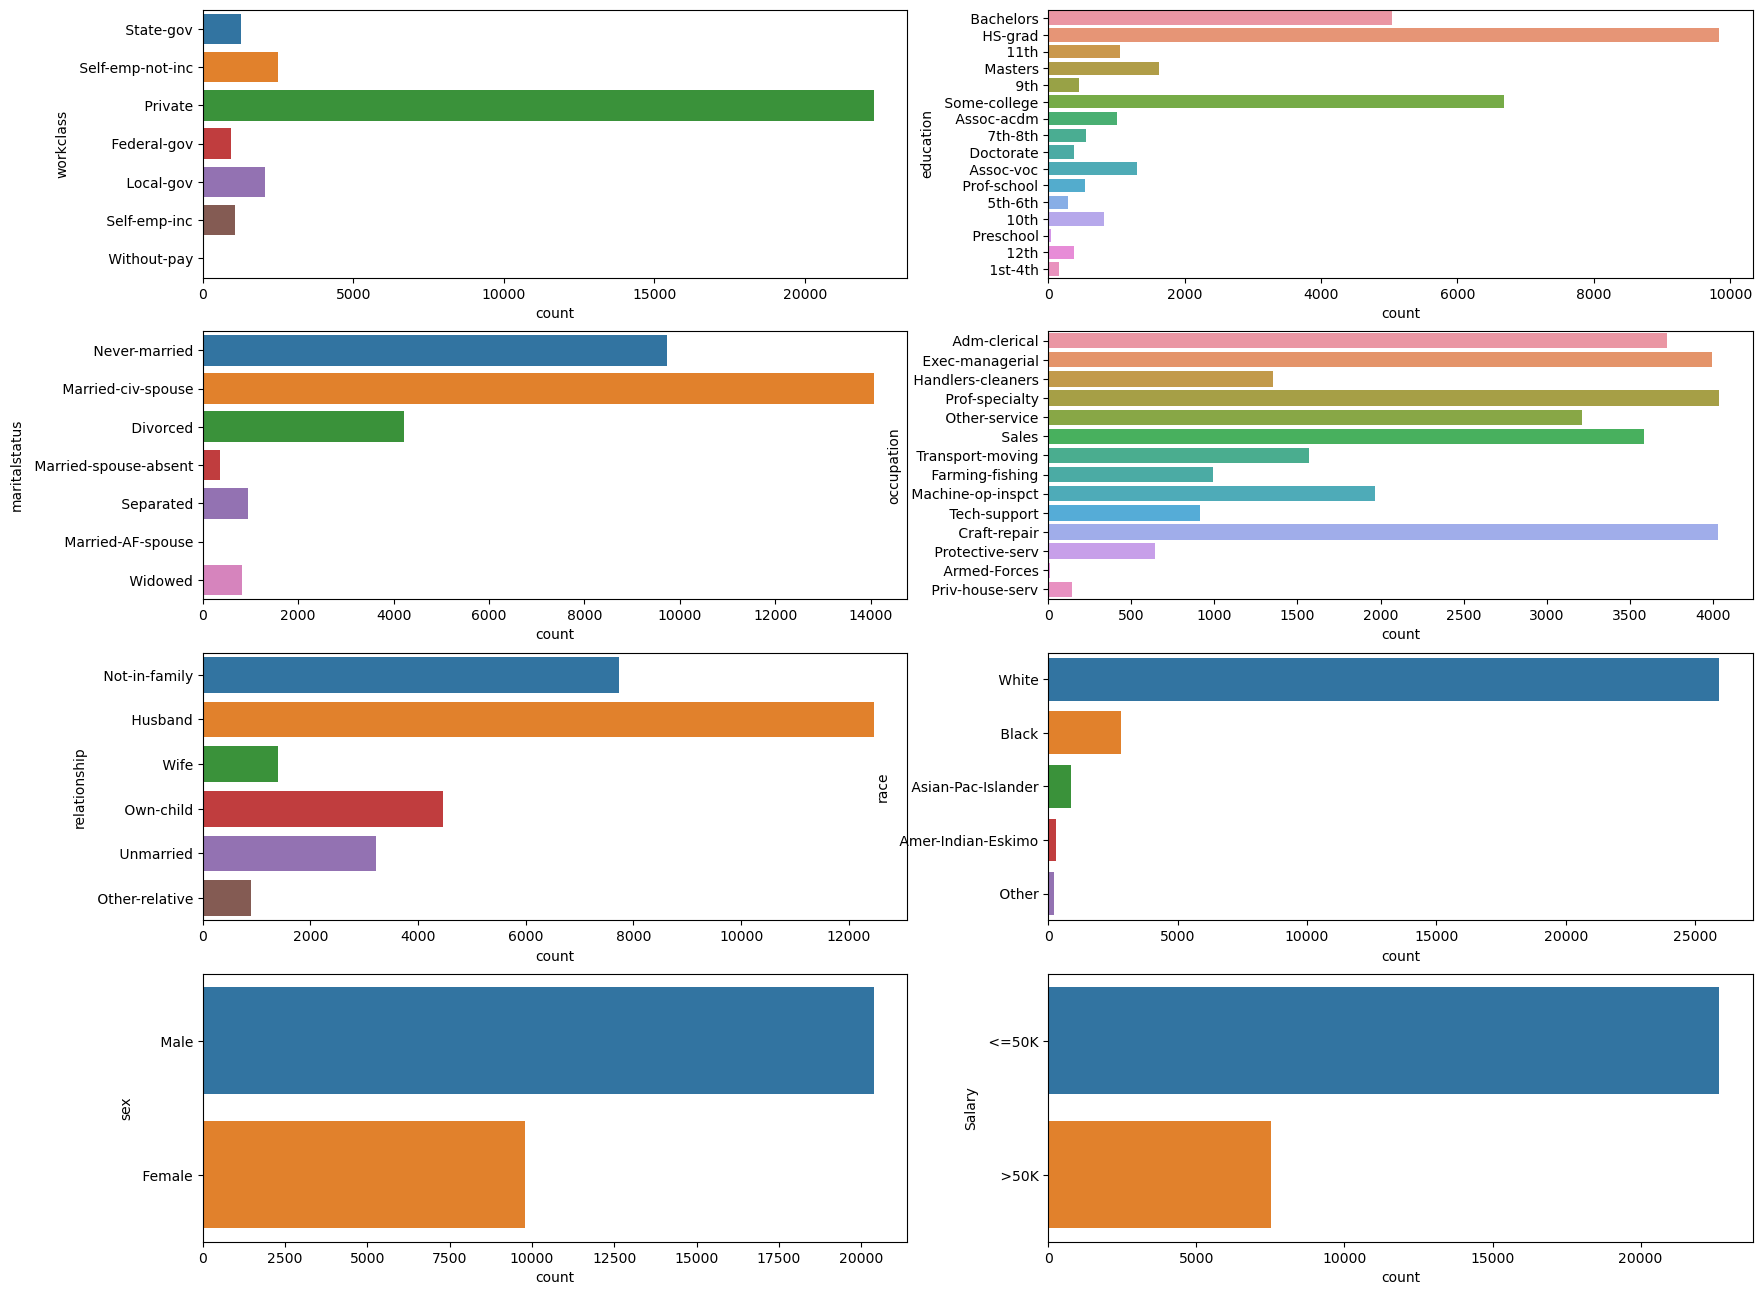

In [23]:
# Ploting Countolot for Categorical data

plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=Train, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=Train, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=Train, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=Train, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=Train, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=Train, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=Train, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=Train, y='Salary')];

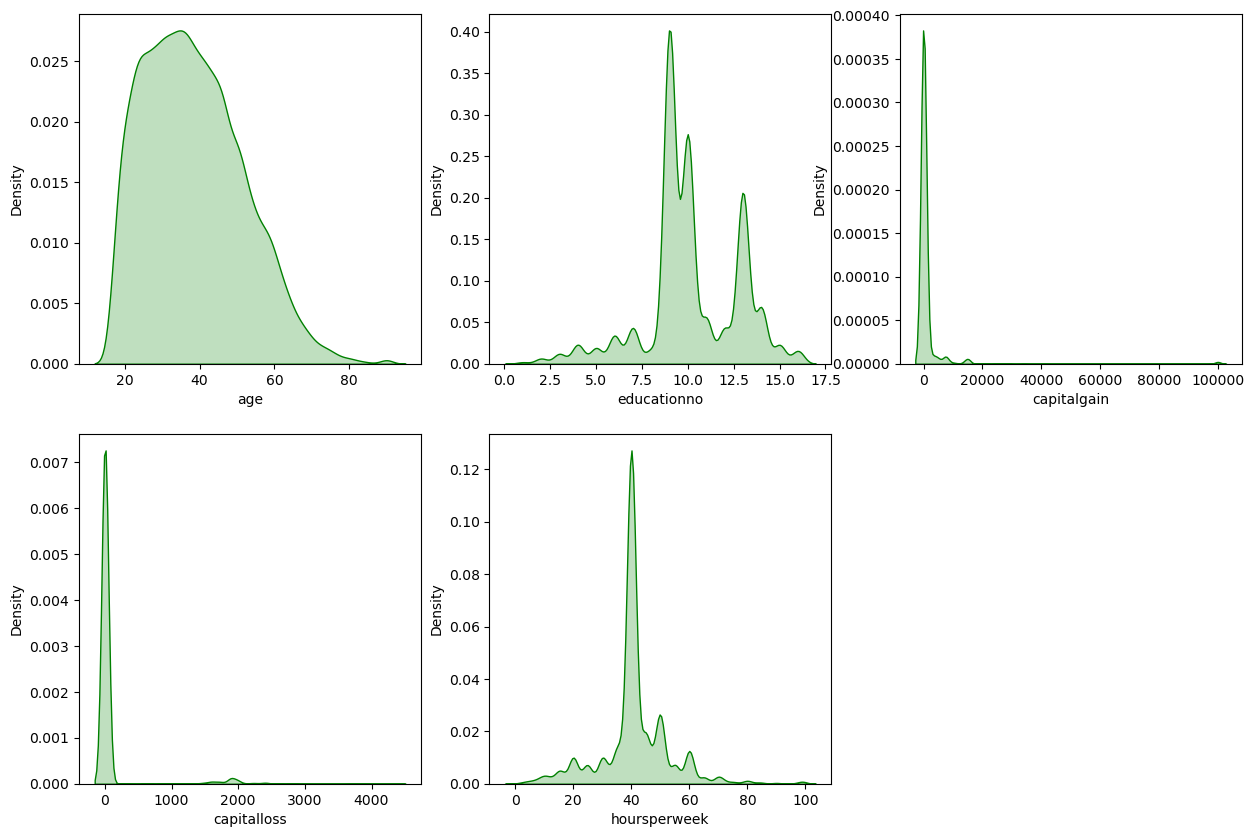

In [24]:
no_columns = Train.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(15,10))
for i,column in enumerate(no_columns,1):
    plt.subplot(2,3,i)
    sns.kdeplot(Train[column],color='g',shade=True)

# Ploting Boplot for numerical data

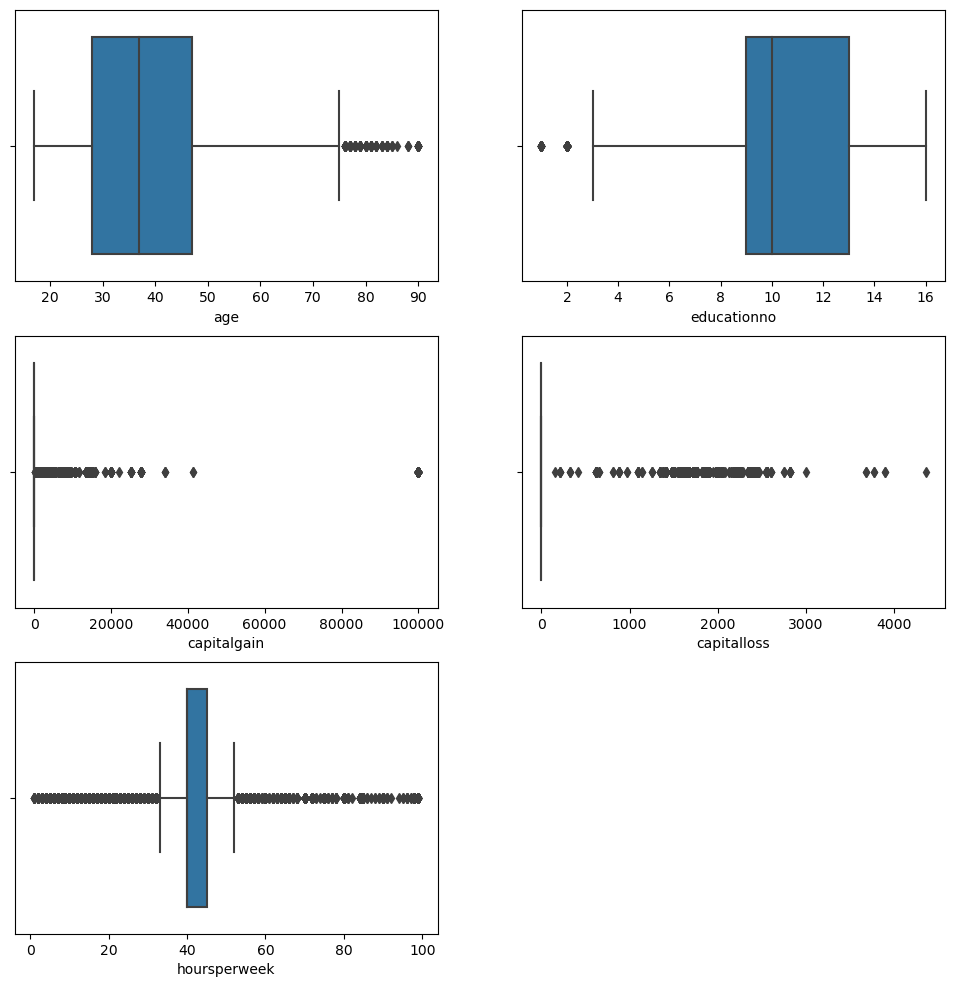

In [25]:
plt.figure(figsize=(12,12))
[plt.subplot(3,2,1), sns.boxplot(x=Train["age"])];

[plt.subplot(3,2,2), sns.boxplot(x=Train["educationno"])];

[plt.subplot(3,2,3), sns.boxplot(x=Train["capitalgain"])];

[plt.subplot(3,2,4), sns.boxplot(x=Train["capitalloss"])];

[plt.subplot(3,2,5), sns.boxplot(x=Train["hoursperweek"])];

# Converting categorical data into Label Encoding data

In [26]:
# Convering values of "salary" column with use of "convert" function

convert = {' >50K': 1, ' <=50K': 2}
df1 = df1.replace({'Salary': convert})

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [28]:
for i in columns:
    df1[i]= label_encoder.fit_transform(df1[i])
    
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,2
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,2
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,2


# SalaryData_Test

In [29]:
# importing test dataaset

Test=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Assignment DS (Husen)\Assignment No 12\Naive Bayes\SalaryData_Test.csv")
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Performing EDA & Visualization on "Test" dataset

# EDA

In [30]:
Test.shape

(15060, 14)

In [31]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [32]:
Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [33]:
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [34]:
Test[Test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [35]:
# Correlation

# Checking Correlation between numerical function

# correlation without droping duplicated raws

correlationXx = Test.corr() 
correlationXx

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


# Visualization

<AxesSubplot:>

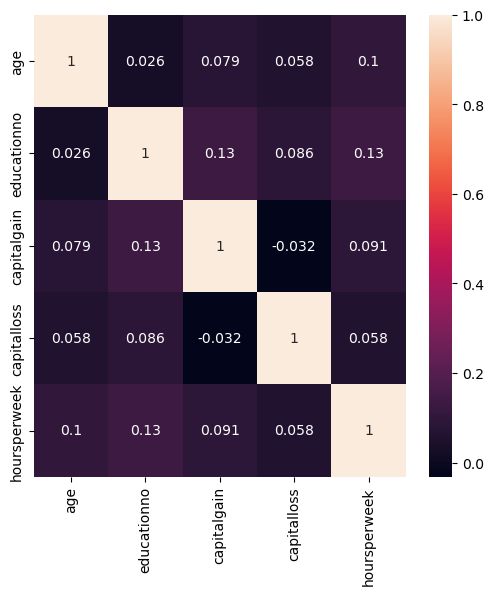

In [36]:
# creating heatmap by use of correlation

plt.figure(figsize=(6,6))
sns.heatmap(correlationXx,annot=True)

In [37]:
df2=Test.drop_duplicates()
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [38]:
Test['workclass'].unique(), Test['workclass'].value_counts()

(array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
        ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             11021
  Self-emp-not-inc     1297
  Local-gov            1033
  State-gov             667
  Self-emp-inc          572
  Federal-gov           463
  Without-pay             7
 Name: workclass, dtype: int64)

In [39]:
Test['education'].unique(), Test['education'].value_counts()

(array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
        ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
        ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
        ' Preschool'], dtype=object),
  HS-grad         4943
  Some-college    3221
  Bachelors       2526
  Masters          887
  Assoc-voc        652
  11th             571
  Assoc-acdm       499
  10th             403
  7th-8th          266
  Prof-school      243
  9th              221
  12th             200
  Doctorate        169
  5th-6th          161
  1st-4th           71
  Preschool         27
 Name: education, dtype: int64)

In [40]:
Test['maritalstatus'].unique(), Test['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
        ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
       dtype=object),
  Married-civ-spouse       6990
  Never-married            4872
  Divorced                 2083
  Separated                 472
  Widowed                   450
  Married-spouse-absent     182
  Married-AF-spouse          11
 Name: maritalstatus, dtype: int64)

In [41]:
Test['occupation'].unique(), Test['occupation'].value_counts()

(array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
        ' Other-service', ' Prof-specialty', ' Craft-repair',
        ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
        ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
        ' Armed-Forces'], dtype=object),
  Exec-managerial      1992
  Craft-repair         1990
  Prof-specialty       1970
  Sales                1824
  Adm-clerical         1819
  Other-service        1596
  Machine-op-inspct    1004
  Transport-moving      744
  Handlers-cleaners     696
  Tech-support          508
  Farming-fishing       491
  Protective-serv       332
  Priv-house-serv        89
  Armed-Forces            5
 Name: occupation, dtype: int64)

In [42]:
Test['relationship'].unique(), Test['relationship'].value_counts()

(array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
        ' Other-relative'], dtype=object),
  Husband           6203
  Not-in-family     3976
  Own-child         2160
  Unmarried         1576
  Wife               685
  Other-relative     460
 Name: relationship, dtype: int64)

In [43]:
Test['race'].unique(), Test['race'].value_counts()

(array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
        ' Asian-Pac-Islander'], dtype=object),
  White                 12970
  Black                  1411
  Asian-Pac-Islander      408
  Amer-Indian-Eskimo      149
  Other                   122
 Name: race, dtype: int64)

In [44]:
Test['sex'].unique(), Test['sex'].value_counts()

(array([' Male', ' Female'], dtype=object),
  Male      10147
  Female     4913
 Name: sex, dtype: int64)

In [45]:
Test['occupation'].unique(), Test['occupation'].value_counts()

(array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
        ' Other-service', ' Prof-specialty', ' Craft-repair',
        ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
        ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
        ' Armed-Forces'], dtype=object),
  Exec-managerial      1992
  Craft-repair         1990
  Prof-specialty       1970
  Sales                1824
  Adm-clerical         1819
  Other-service        1596
  Machine-op-inspct    1004
  Transport-moving      744
  Handlers-cleaners     696
  Tech-support          508
  Farming-fishing       491
  Protective-serv       332
  Priv-house-serv        89
  Armed-Forces            5
 Name: occupation, dtype: int64)

In [46]:
Test['native'].unique(), Test['native'].value_counts()

(array([' United-States', ' Peru', ' Guatemala', ' Mexico',
        ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
        ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
        ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
        ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
        ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
        ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
        ' Hong', ' Greece', ' Trinadad&Tobago',
        ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object),
  United-States                 13788
  Mexico                          293
  Philippines                      95
  Puerto-Rico                      66
  Germany                          65
  Canada                           56
  El-Salvador                      47
  India                            47
  China                            45
  Cuba                             41
  England       

In [47]:
Test['Salary'].unique(), Test['Salary'].value_counts()

(array([' <=50K', ' >50K'], dtype=object),
  <=50K    11360
  >50K      3700
 Name: Salary, dtype: int64)

# Converting categorical data into Label Encoding data

In [48]:
for i in columns:
    df2[i]= label_encoder.fit_transform(df2[i])
    
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [49]:
# Convering values of "salary" column with use of "convert" function

convert = {' >50K': 1, ' <=50K': 2}
df2 = df2.replace({'Salary': convert})

In [50]:
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,2
1,38,2,11,9,2,4,0,4,1,0,0,50,37,2
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,2
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,2
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,2
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,2


# Applying Naive Bayes

In [51]:
x_train = df1.iloc[:,0:13]
y_train = df1.iloc[:,13]
x_test = df2.iloc[:,0:13]
y_test = df2.iloc[:,13]

# 1. Gaussian Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
clsfrgnb = GaussianNB()   

# clsfrgnb = claasification with Gussian Naive Bayes

In [53]:
# Model Making

model1=clsfrgnb.fit(x_train, y_train)

In [54]:
# Prediction with x_test

y_pred_gnb = model1.predict(x_test)  

# gnb=gausian naive bayes

In [55]:
y_pred_gnb

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gnb)   #Confusion matrix

array([[ 1180,  2330],
       [  564, 10056]], dtype=int64)

In [57]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3510
2,10620


In [58]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten())*100)

Accuracy 79.51875442321303


# 2. Multinomial Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
clsfrmnb = MultinomialNB()   

# clsfrgnb = claasification with Multinominal Naive Bayes

In [60]:
model2=clsfrmnb.fit(x_train, y_train)
model2

MultinomialNB()

In [61]:
y_pred_mnb = model2.predict(x_test)   

# mnb=Multinominal naive bayes

In [62]:
# Confusion Metrix

confusion_matrix(y_test, y_pred_mnb)

array([[  777,  2733],
       [  469, 10151]], dtype=int64)

In [63]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3510
2,10620


In [64]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7733899504600141


In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,y_pred_mnb) 

0.7733899504600141

# 3. Cross Validation Check

In [67]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MNB', MultinomialNB()))

In [69]:
results = []
names = []
scoring = 'accuracy'

In [70]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.796379 (0.005843)
KNN: 0.824777 (0.010738)
CART: 0.786120 (0.006677)
NB: 0.793703 (0.010001)
MNB: 0.768316 (0.008122)


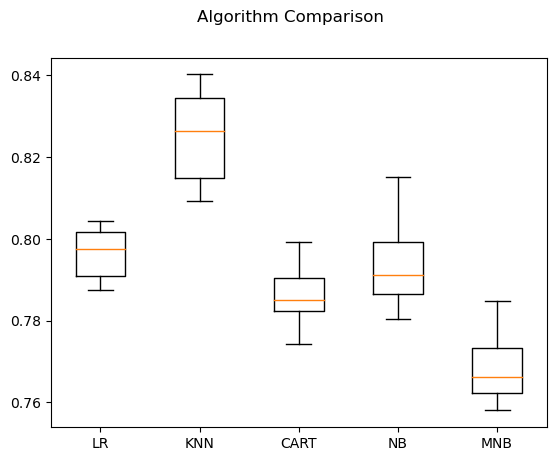

In [71]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Here I compare with different algorithms for checking which algorith gives us higher accuracy

### After comparing "KNN" gives higher accuracy, Accuracy of KNN = 0.824777